***Reading the dataset using pandas***

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Real estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


***Importing some Libraries for the Linear regression to apply from sklearn***

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

***Spliting the data set using train_test_split and setting the best fit line***

In [162]:
# For Xs we don't need to use the .reshape(-1,1) as it is already done in the 2d array
data.rename(columns={'X1 transaction date': 'TransactionDate', 'X2 house age': 'HouseAge', 'X3 distance to the nearest MRT station': 'Distance','X4 number of convenience stores': 'Stores', 'X5 latitude': 'Latitude', 'X6 longitude': 'Longitude', 'Y house price of unit area': 'Price'}, inplace=True)

print(data.head())

Xs = data[['TransactionDate', 'HouseAge','Distance', 'Stores', 'Latitude', 'Longitude']]
y = data['Price'].values.reshape(-1, 1)

# # Out of 1000 samples, we have 800 for training and 200 for testing
# #Train is 80% and Test is 20%
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

MLReg = LinearRegression()
MLReg.fit(X_train, y_train)

   No  TransactionDate  HouseAge   Distance  Stores  Latitude  Longitude  \
0   1         2012.917      32.0   84.87882      10  24.98298  121.54024   
1   2         2012.917      19.5  306.59470       9  24.98034  121.53951   
2   3         2013.583      13.3  561.98450       5  24.98746  121.54391   
3   4         2013.500      13.3  561.98450       5  24.98746  121.54391   
4   5         2012.833       5.0  390.56840       5  24.97937  121.54245   

   Price  
0   37.9  
1   42.2  
2   47.3  
3   54.8  
4   43.1  


LinearRegression()

***Slope and Intercept of the best fit line***

In [164]:
print('Slope is: ', MLReg.coef_)
print('Intercept is: ', MLReg.intercept_)
print('The linear model is:- Y=  {:.2} + {:.2}*TransactionDate+ {:.2}*HouseAge+ {:.2}*Distance+ {:.2}*Stores  + {:.2}*Latitude  + {:.2}*Longitude  '.format(MLReg.intercept_[0], MLReg.coef_[0][0], MLReg.coef_[0][1], MLReg.coef_[0][2], MLReg.coef_[0][3], MLReg.coef_[0][4], MLReg.coef_[0][5]))

Slope is:  [[ 5.44074186e+00 -2.70791490e-01 -4.75863892e-03  1.09142527e+00
   2.29043054e+02 -2.94925908e+01]]
Intercept is:  [-13044.23191716]
The linear model is:- Y=  -1.3e+04 + 5.4*TransactionDate+ -0.27*HouseAge+ -0.0048*Distance+ 1.1*Stores  + 2.3e+02*Latitude  + -2.9e+01*Longitude  


In [ ]:
y_pred = MLReg.predict(X_test)

***custom function to predict the cost for the given parameters***

In [189]:
def predictOutcome(TransactionDate, HouseAge, Distance, Stores, Latitude, Longitude):
  Y = -1.3e+04 + 5.4*TransactionDate - 0.27*HouseAge - 0.0048 * Distance + 1.1*Stores + 2.3e+02*Latitude - 2.9e+01*Longitude
  return Y

priceOfHouse = predictOutcome(100, 500, 20000, 100, 600, 50)
print('The predicted price of the house is: ', priceOfHouse)

The predicted price of the house is:  123969.0


***Finding the MSE, MAE and RMSE***

In [194]:
prediction = MLReg.predict(X_test)
mae = mean_absolute_error(y_test, prediction)
print(f'The mean absolute error is: {mae:.3f} ')

mse = mean_squared_error(y_test, prediction)
print(f'The mean squared error is: {mse:.3f}')

rmse = np.sqrt(mse)
print(f'The root mean squared error is: {rmse:.3f}',)

MLReg.score(Xs, y)

The mean absolute error is: 5.305 
The mean squared error is: 53.506
The root mean squared error is: 7.315


0.5821219797424637

***Plotiing the graph using pairplot present in sns library***

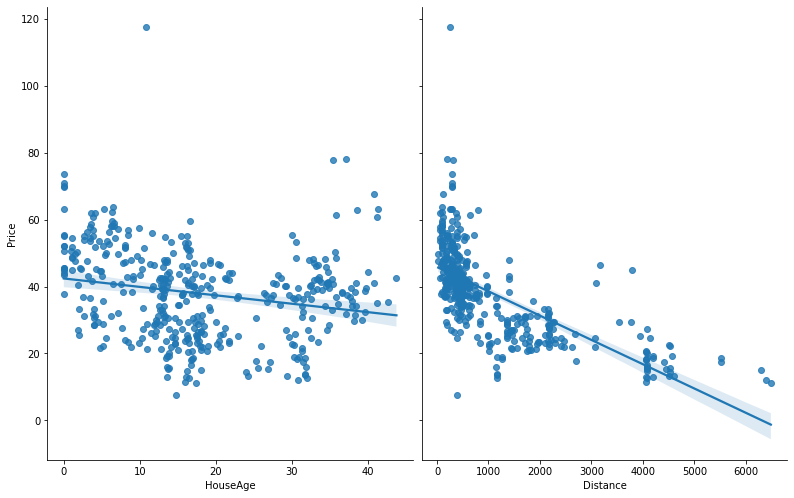

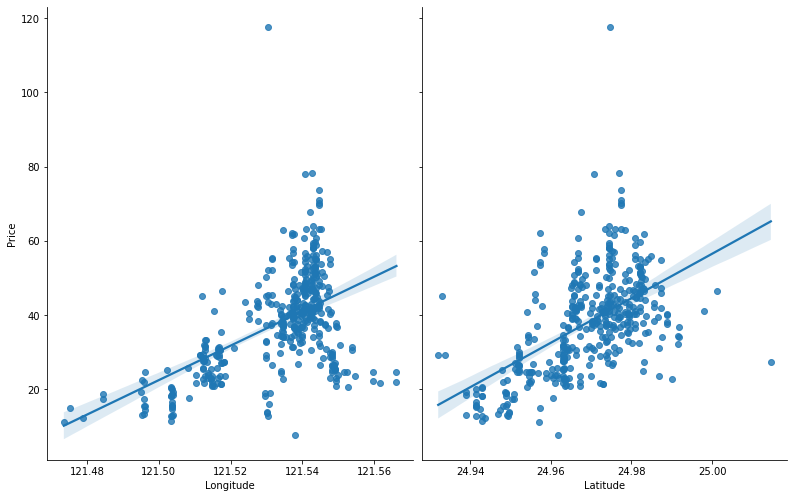

In [214]:
import seaborn as sns
sns.pairplot(data, x_vars=['HouseAge', 'Distance'], y_vars='Price', height=7, aspect=0.8, kind='reg')
sns.pairplot(data, x_vars=['Longitude','Latitude'], y_vars='Price', height=7, aspect=0.8, kind='reg')